In [ ]:
from __future__ import annotations

import os

import numpy as np

os.environ["OMP_NUM_THREADS"] = "1"
# See the following issue for more information: https://github.com/ultralytics/yolov5/issues/2863#issuecomment-900973440

embeddings_avg_mptrj = np.load(
    "/mnt/shared/jmp-wbm-embeddings-omat/mptrj/embeddings_avg.npy"
)
labels_mptrj = np.load("/mnt/shared/jmp-wbm-embeddings-omat/mptrj/labels.npy")

embeddings_avg_wbm = np.load(
    "/mnt/shared/jmp-wbm-embeddings-omat/wbm/embeddings_avg.npy"
)
labels_wbm = np.load("/mnt/shared/jmp-wbm-embeddings-omat/wbm/labels.npy")

print(embeddings_avg_mptrj.shape, labels_mptrj.shape)
print(embeddings_avg_wbm.shape, labels_wbm.shape)

(10000, 256) (10000, 1)
(10000, 256) (10000, 1)


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

sns.set_theme()

# Perform t-SNE on all embeddings
all_embeddings = np.concatenate([embeddings_avg_mptrj, embeddings_avg_wbm], axis=0)
all_labels = np.concatenate([labels_mptrj, labels_wbm], axis=0)
all_datasets = np.concatenate(
    [np.zeros_like(labels_mptrj), np.ones_like(labels_wbm)], axis=0
)

tsne = TSNE(n_components=2, random_state=42, perplexity=1000)
all_embeddings_tsne = tsne.fit_transform(all_embeddings)


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

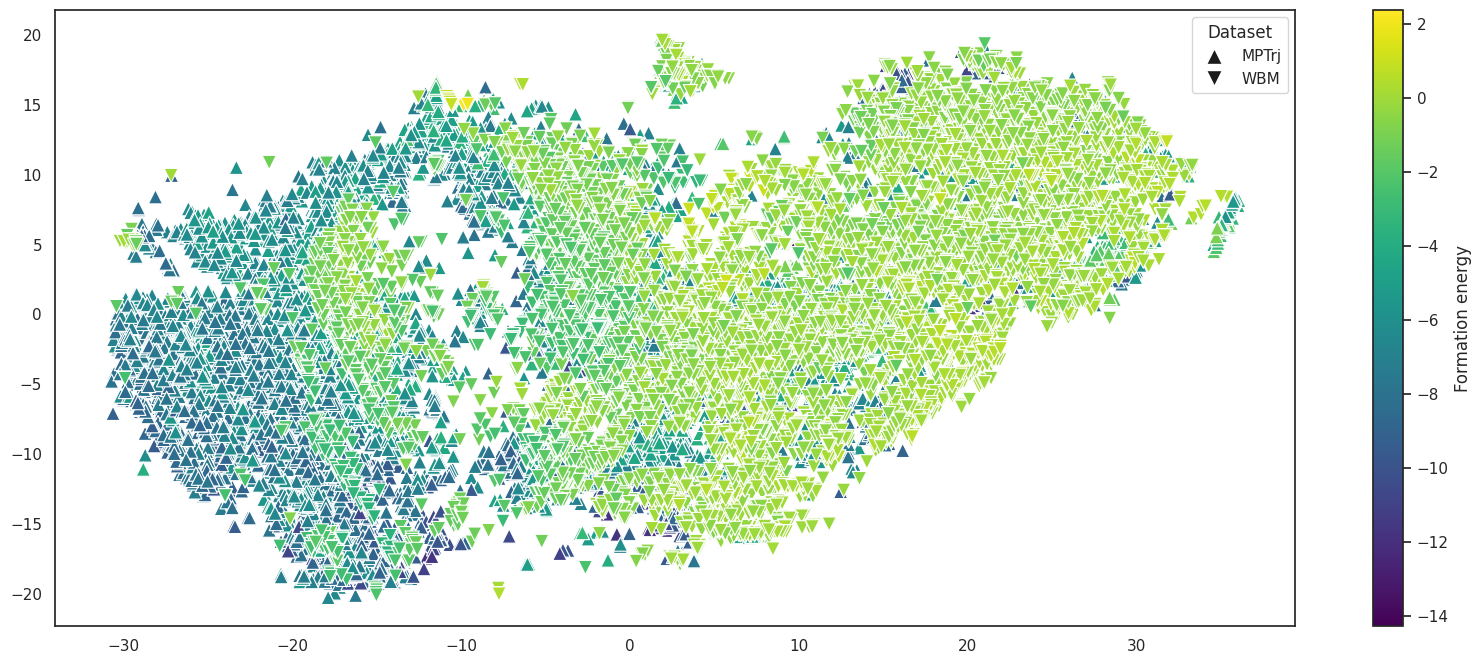

In [3]:
markers = ["^", "v"]

sns.set_theme(
    style="white",
    # palette=sns.color_palette("viridis", as_cmap=True),
)

# Plot t-SNE of all embeddings,
markersize = 105
# Colored by the labels (formation energy) and hatch = dataset (mptrj or wbm)
fig, ax = plt.subplots(figsize=(20, 8))
scatter = sns.scatterplot(
    x=all_embeddings_tsne[:, 0],
    y=all_embeddings_tsne[:, 1],
    hue=all_labels.flatten(),
    style=all_datasets.flatten(),
    markers=markers,
    palette="viridis",
    ax=ax,
    legend=False,
    s=markersize,
)

# Create a colorbar
norm = plt.Normalize(all_labels.min(), all_labels.max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Formation energy")

# Add legend for markers
handles, labels = scatter.get_legend_handles_labels()
dataset_labels = ["MPTrj", "WBM"]
for i, label in enumerate(dataset_labels):
    handles.append(
        plt.Line2D(
            [0],
            [0],
            marker=markers[i],
            color="w",
            markerfacecolor="k",
            markersize=12,
        )
    )
    labels.append(label)
ax.legend(handles, labels, title="Dataset")

plt.show()

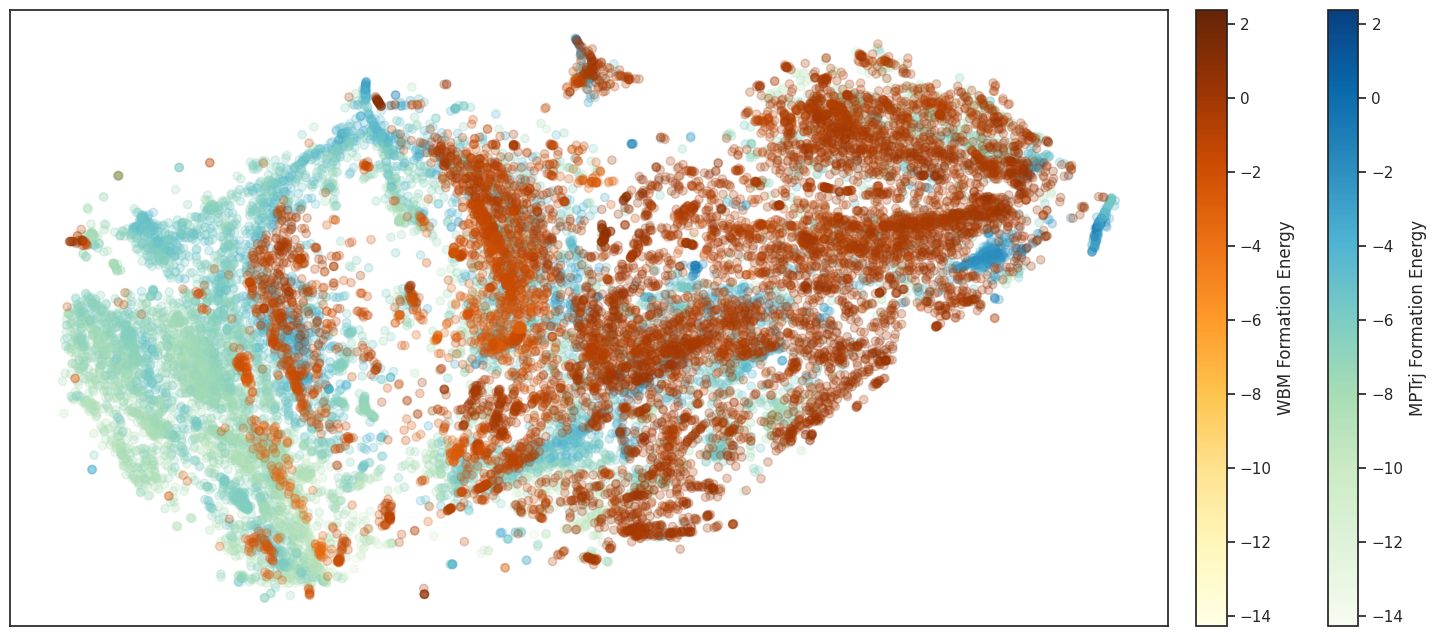

In [14]:
sns.set_theme(style="white")

# Create two distinct color palettes using different parts of the color spectrum
# You can adjust these palettes to get different color combinations
c1, c2 = "GnBu", "YlOrBr"
palette1 = sns.color_palette(c1, as_cmap=True)  # For MPTrj
palette2 = sns.color_palette(c2, as_cmap=True)  # For WBM

# Normalize the formation energies to [0,1] range for color mapping
norm = plt.Normalize(all_labels.min(), all_labels.max())

# Create separate color arrays for each dataset
colors = np.zeros((len(all_labels), 3))  # RGB array

# Assign colors based on dataset and formation energy
mptrj_mask = (
    all_datasets.flatten() == all_datasets.flatten()[0]
)  # Assuming first value represents MPTrj
wbm_mask = ~mptrj_mask

# Map colors for each dataset
colors[mptrj_mask] = palette1(norm(all_labels.flatten()[mptrj_mask]))[:, :3]
colors[wbm_mask] = palette2(norm(all_labels.flatten()[wbm_mask]))[:, :3]

# Create the plot
fig, ax = plt.subplots(figsize=(20, 8))
scatter = plt.scatter(
    all_embeddings_tsne[:, 0],
    all_embeddings_tsne[:, 1],
    c=colors,
    # s=markersize,
    alpha=0.25,
)

# Create two separate colorbars for each dataset
norm = plt.Normalize(all_labels.min(), all_labels.max())
sm1 = plt.cm.ScalarMappable(cmap=c1, norm=norm)
sm2 = plt.cm.ScalarMappable(cmap=c2, norm=norm)

# Add colorbars
cbar1 = fig.colorbar(sm1, ax=ax, location="right", pad=-0.05)
cbar2 = fig.colorbar(sm2, ax=ax, location="right", pad=0.02)

# Label colorbars
cbar1.set_label("MPTrj Formation Energy")
cbar2.set_label("WBM Formation Energy")

# Hide axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

plt.savefig("tsne.pdf", bbox_inches="tight")
plt.show()